# Q1: Linear Programs

## KKTConditions

**Stationarity**       
$$\Delta c^Tx + \mu^T\Delta(Ax-b) = 0$$
this simplifies to
$$c^T+\mu^TA = 0$$
$$c+A^T\mu = 0$$

**Complementary Slackness**       
$$\mu^T(Ax-b) = 0$$

**Primal Feasibility**     
$$Ax-b \leq \vec{0}$$

**Dual Feasibility**       
$$\mu \geq \vec{0}$$


## Optimal on boundary

**Geometric Intuition**      

This is because the optimization function ($c^Tx$) is linear, and thus is a monotonous function. Thus, the unbounded minimum of the unconstrained problem will be found at either $-\inf$ or $\inf$. 

Thus, the optimal value of the constrained optimization problem of a linear must be found at one or more of the boundary functions.

**Algebraic Proof**      

If the optimal point is in the interior of the feasible region, then there are no active constraints.

If there are no active constraints, that means that $$Ax-b \neq 0$$

Based on complementary slackness, for a point to be optimal the following must be true:
$$\mu^T(Ax-b) = 0$$

Thus, $$\mu = \vec{0}$$

However, if $\mu = \vec{0}$, then the stationary condition simplifies to
$$c = \vec{0}$$

If $c = \vec{0}$, that is the trivial problem where we are optimizing a function that is always $0$. Otherwise, this would be a contradiction to the problem we are solving.


Stated a different way:

If $c \neq 0$, then that means that $\mu \neq \vec{0}$, which means that there exists an active constraint. 

Thus, the solution to a linear problem (where the function is not just zero) must lie on the boundaries of that problem.


# Q2: Norms in LP

We are minimizing $y-x\theta$, or the distance between the true values and the estimated values. However, we can define the "distance" using different norms.

**Rewriting $l_1$ Regression**     

$$\min_\theta \left\Vert{y-x\theta}\right\Vert_1$$

The $l_1$ norm is the sum of the absolute values of the coordinates.

So we are equivalently trying to minimize elementwise
$$\sum_{i=0}^n |y_i-x_i \theta_i|$$

To deal with the absolute values, we can upper bound the absolute value of each coordinate  using a corresponding slack variable:
$$-s_i \leq y_i - x_i\theta_i \leq s_i \forall i$$

Expressing all these slack variables as a vector, $s$ our objective function is then to minimize:
$$\min_{s,\theta} 1^Ts$$

Subject to the constraint of our definition of the slack variables:
$$y - x\theta \leq s$$
$$y - x\theta \geq -s$$

Rewritten, this is:
$$-x\theta-s \leq -y$$
$$x\theta-s \leq y$$

**Rewriting $l_\infty$**     
$$\min_\theta \left\Vert y-x\theta\right\Vert_\infty$$

The infinity norm takes the largest absolute value of the coordinates.

Since the infinity norm only considers one coordinate (the largest absolute value), we only need a scalar slack variable rather than a vector of slack variables.

Thus, to upper bound the entire $x$ vector with its largest absolute value:
$$-s\vec{1} \leq y - x\theta \leq s\vec{1}$$

Thus, our objective function is simply to minimize:
$$\min_{s,\theta} s$$

Subject to the constraint of our definition of the slack variable:
$$y - x\theta \leq s\vec{1}$$
$$y - x\theta \geq -s\vec{1}$$

Rewritten, this is:
$$-x\theta-s\vec{1} \leq -y$$
$$x\theta-s\vec{1} \leq y$$

# Q3: Optimizing w Norms

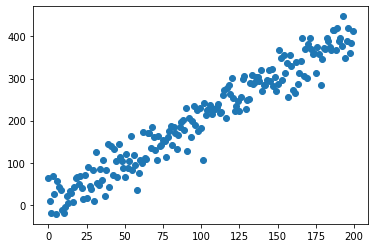

In [8]:
# l_1 and l_infinity regression using cvxpy
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

# generate a synthetic dataset

# actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30

# datapoints
x = np.arange(0,N)
y = theta1_act * x + theta2_act *np.ones([1,N]) + np.random.normal(0,mag,N)

plt.figure()
# Scatter plot of data
plt.scatter(x,y)
plt.show()


In [3]:
import cvxpy as cp
import numpy as np

# length of theta
tlen = 2

# declaring coefficients to optimize
theta = cvx.Variable(tlen)
theta_inf = cvx.Variable(tlen)

# declaring args as vectors
xvec = [x,[1 for _ in x]]
yvec = y[0]

In [4]:
# l1 norm

s = cp.Variable(N)
f = np.ones(N)*s
g = [np.negative(xvec*theta)-s<=np.negative(yvec),xvec*theta-s<=yvec]
sol = cp.Problem(cp.Minimize(f), g)
print("s:", sol.solve(solver=cp.ECOS))
print("theta:", theta.value)


s: 4750.1898721998095
theta: [2.06568591 3.49466839]


In [5]:
# linf norm

s_inf = cp.Variable()
f_inf = s_inf
s1 = s_inf*np.ones(N)
g_inf = [np.negative(xvec*theta_inf)-s1<=np.negative(yvec),xvec*theta_inf-s1<=yvec]
sol_inf = cp.Problem(cp.Minimize(f_inf), g_inf)
print("s:", sol_inf.solve(solver=cp.ECOS))
print("theta:", theta_inf.value)


s: 83.33979032202626
theta: [2.0467451  4.00104254]


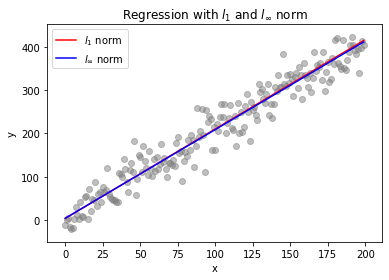

In [7]:
plt.plot(x, [theta.value[0]*xi + theta.value[1] for xi in x],c="r", label="$l_1$ norm");
plt.plot(x, [theta_inf.value[0]*xi + theta_inf.value[1] for xi in x],c="b", label="$l_\infty$ norm");
plt.scatter(x, y, c="gray", alpha=0.5);
plt.title("Regression with $l_1$ and $l_\infty$ norm");
plt.legend();
plt.xlabel("x");
plt.ylabel("y");
plt.show();